In [1]:
import numpy as np
from PIL import Image
from io import BytesIO
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
Model=tf.keras.models.load_model("./trained_model")

In [26]:
dataset = tf.keras.utils.image_dataset_from_directory(
    "dataset",
    shuffle = True,
    seed=123,
    image_size = (294,222),
    batch_size = 32
)

Found 6000 files belonging to 6 classes.


In [27]:
class_names = dataset.class_names
class_names

['1. Eczema',
 '2. Melanoma',
 '3. Atopic Dermatitis',
 '4. Basal Cell Carcinoma',
 '5. Melanocytic Nevi',
 '6. Benign Keratosis']

In [28]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    ds_size=len(ds)

    if shuffle:
        ds=ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

In [29]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

Image to predict
Image's actual label: 2. Melanoma
1/1 [==============================] - 1s 615ms/step
Predicted:  2. Melanoma


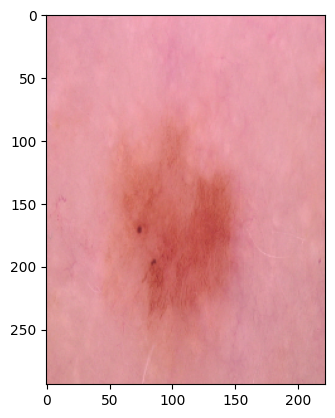

In [39]:
import numpy as np
for image_batch, label_batch in test_ds.take(1):
    print("Image to predict")
    print("Image's actual label:", class_names[label_batch[0].numpy()])
    batch_prediction = Model.predict(image_batch)
    print("Predicted: ",class_names[np.argmax(batch_prediction[0])])
    plt.imshow(image_batch[1].numpy().astype('uint8'))